In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Define the mapping of numbers to emotion labels
emotion_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Load the dataset
data = pd.read_csv('/content/text.csv')

# Check if the dataset has been loaded correctly
print("Data preview:")
print(data.head())

Data preview:
   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


Distribution of Emotions:
emotion
joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64


<ipython-input-3-b8927b310f20>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')


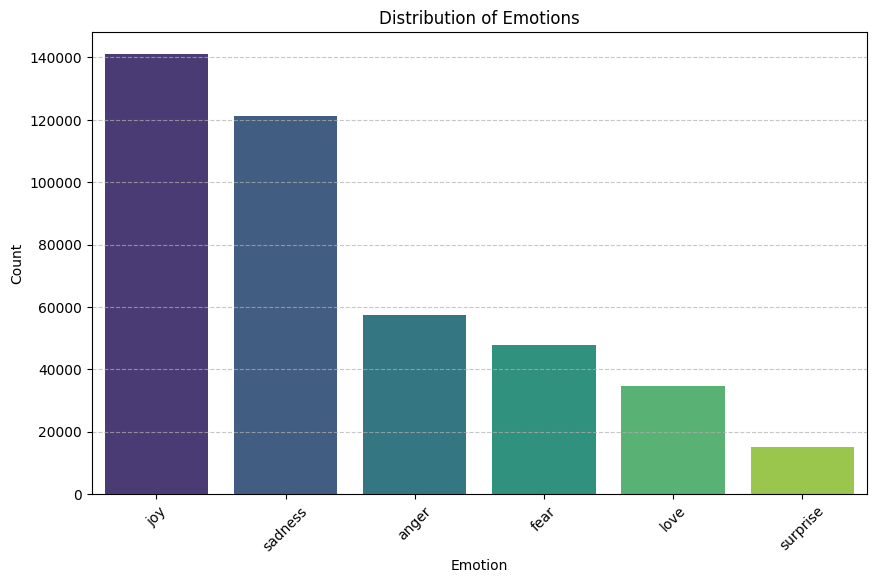

In [3]:
# Extract and map numeric labels to emotion names
data['emotion'] = data['label'].map(emotion_mapping)

# Calculate the distribution of emotions
emotion_counts = data['emotion'].value_counts()

# Print distribution
print("Distribution of Emotions:")
print(emotion_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

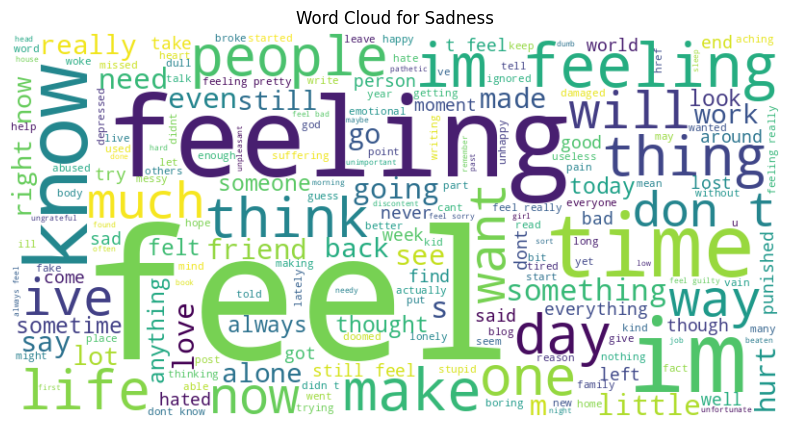

Word cloud saved as wordcloud_sadness.png


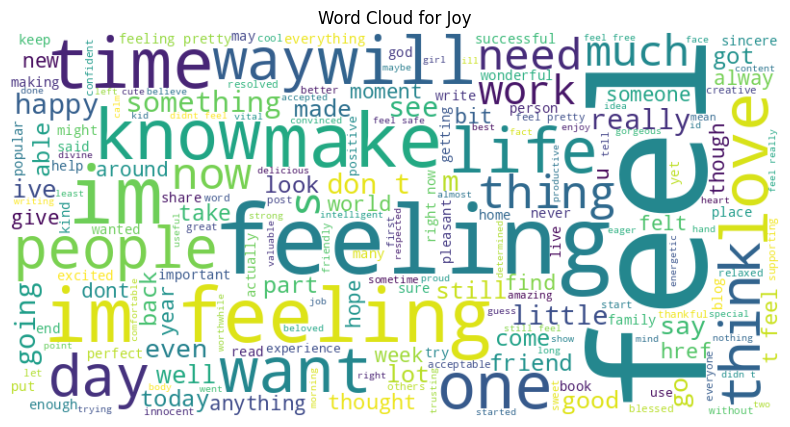

Word cloud saved as wordcloud_joy.png


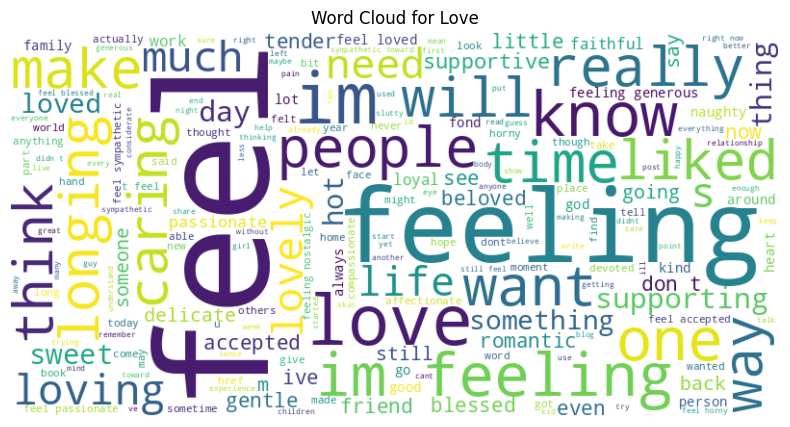

Word cloud saved as wordcloud_love.png


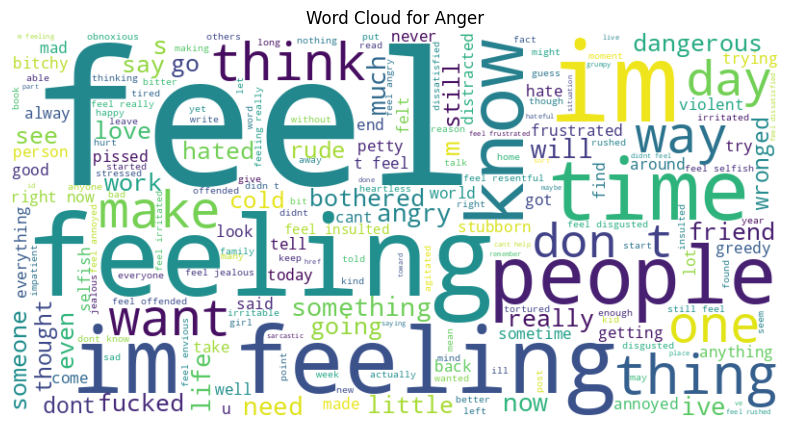

Word cloud saved as wordcloud_anger.png


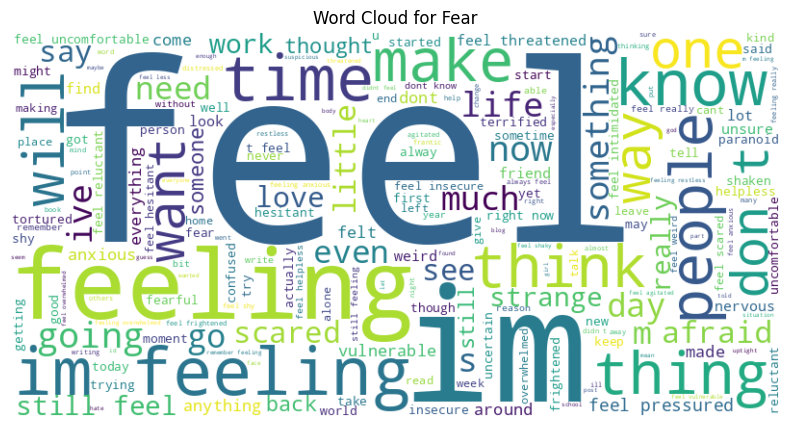

Word cloud saved as wordcloud_fear.png


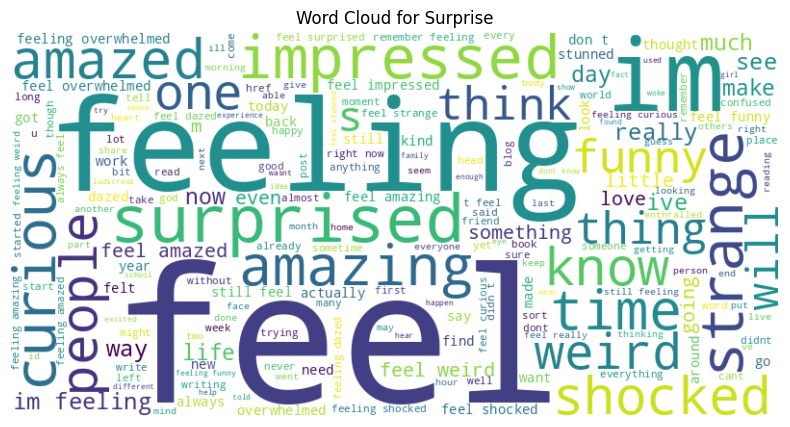

Word cloud saved as wordcloud_surprise.png


In [9]:
data['emotion'] = data['label'].map(emotion_mapping)

# Create word clouds for each emotion
for emotion in emotion_mapping.values():
    # Filter the text data for the current emotion
    emotion_text = ' '.join(data[data['emotion'] == emotion]['text'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(emotion_text)

    # Save the word cloud to a file
    wordcloud_file = f'wordcloud_{emotion}.png'
    wordcloud.to_file(wordcloud_file)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(f'Word Cloud for {emotion.capitalize()}')
    plt.show()

    print(f"Word cloud saved as {wordcloud_file}")

In [4]:
# Extract text and labels
texts = data['text']
labels_numeric = data['label']

# Map numeric labels to emotion names
labels = labels_numeric.map(emotion_mapping)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7247
Classification Report:
              precision    recall  f1-score   support

       anger       0.94      0.50      0.65     17295
        fear       0.92      0.35      0.51     14394
         joy       0.67      0.98      0.79     42255
        love       0.97      0.13      0.23     10241
     sadness       0.73      0.94      0.82     36261
    surprise       0.96      0.03      0.06      4597

    accuracy                           0.72    125043
   macro avg       0.86      0.49      0.51    125043
weighted avg       0.79      0.72      0.68    125043



In [ ]:
# Interactive input for new text data
while True:
    new_text = input("Enter a sentence for emotion prediction (or type 'exit' to quit): ")
    if new_text.lower() == 'exit':
        break

    # Transform the input text
    new_X = vectorizer.transform([new_text])
    prediction_numeric = model.predict(new_X)

    # Check the type of prediction
    print(f"Raw prediction: {prediction_numeric[0]}")

    # Ensure prediction is numeric
    try:
        predicted_emotion = emotion_mapping[int(prediction_numeric[0])]
    except ValueError as e:
        #print(f"Error converting prediction: {e}")
        continue

    print(f"Text: {new_text} -> Predicted Emotion: {predicted_emotion}")